/var/folders/_2/bx8gq_2n4pl43ps8xhhr9k1j89gn1y/T/ipykernel_50422/2310241335.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subset_within = gdf[gdf['geometry'].within(salix_b.buffer(.1).geometry[0])]


Text(0.5, 1.0, 'GEDI04_A_2021268203812_O15788_02_T06029_02_002_02_V002.h5')

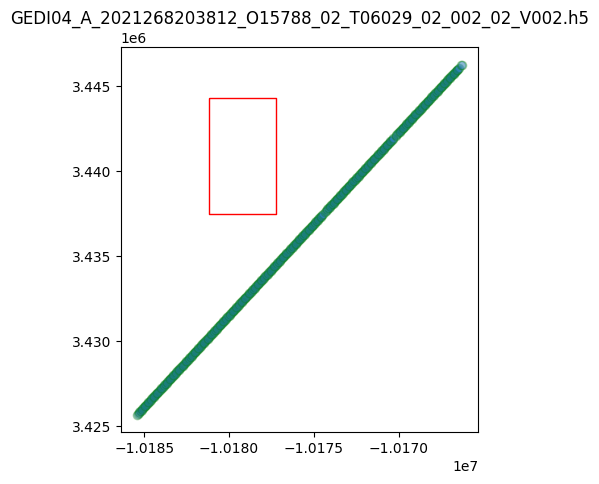

In [57]:
# import python modules
%matplotlib inline
import h5py
import requests as re
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from datetime import datetime
from glob import glob
from harmony import BBox, Client, Collection, Environment, Request
from shapely.geometry import Polygon

subset_df = pd.DataFrame()
subfile='GEDI04_A_2021268203812_O15788_02_T06029_02_002_02_V002.h5'
hf_in = h5py.File(subfile, 'r')
beam = hf_in['BEAM0101']
col_names = []
col_val = []
# read all variables
for key, value in beam.items():
    if key in ['lat_lowestmode', 'lon_lowestmode']:
        col_names.append(key)
        col_val.append(value[:].tolist())

# Appending to the subset_df dataframe
beam_df = pd.DataFrame(map(list, zip(*col_val)), columns=col_names)
subset_df = pd.concat([subset_df, beam_df])
hf_in.close()
# print head of dataframe
gdf = gpd.GeoDataFrame(subset_df, geometry=gpd.points_from_xy(subset_df.lon_lowestmode, subset_df.lat_lowestmode))
salix = gpd.read_file("polygons/atchafalaya_salix_spring15.json") 
b = salix.total_bounds
salix_b = gpd.GeoSeries(Polygon([(b[0],b[3]), (b[2],b[3]), (b[2],b[1]), (b[0],b[1])]))
salix_b.crs = "EPSG:4326"
subset_within = gdf[gdf['geometry'].within(salix_b.buffer(.1).geometry[0])]  

salix_b_epsg = salix_b.to_crs(epsg=3857)
# map of Salix plots
ax=salix_b_epsg.plot(figsize=(5, 5), facecolor="none", edgecolor='red')
subset_within.crs="EPSG:4326"
subset_within_epsg3857 = subset_within.to_crs(epsg=3857)
subset_within_epsg3857.plot(edgecolor='green', alpha=0.3, ax=ax)
ax.set_title(subfile)
# plt.margins(y=0.5, x=1.5)
# ctx.add_basemap(ax, zoom = 13)

/var/folders/_2/bx8gq_2n4pl43ps8xhhr9k1j89gn1y/T/ipykernel_50422/1127593951.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subset_within = gdf[gdf['geometry'].within(salix_b.buffer(.1).geometry[0])]


Text(0.5, 1.0, 'GEDI04_A_2022083212440_O18579_02_T03183_02_003_01_V002.h5')

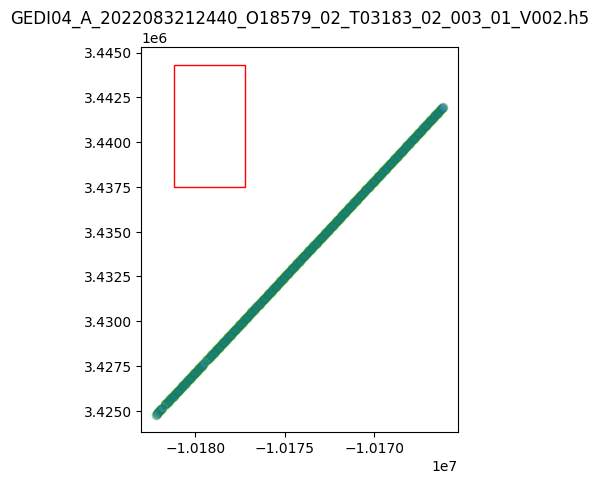

In [60]:

subset_df = pd.DataFrame()
subfile='GEDI04_A_2022083212440_O18579_02_T03183_02_003_01_V002.h5'
hf_in = h5py.File(subfile, 'r')
beam = hf_in['BEAM0101']
col_names = []
col_val = []
# read all variables
for key, value in beam.items():
    if key in ['lat_lowestmode', 'lon_lowestmode']:
        col_names.append(key)
        col_val.append(value[:].tolist())

# Appending to the subset_df dataframe
beam_df = pd.DataFrame(map(list, zip(*col_val)), columns=col_names)
subset_df = pd.concat([subset_df, beam_df])
hf_in.close()
# print head of dataframe
gdf = gpd.GeoDataFrame(subset_df, geometry=gpd.points_from_xy(subset_df.lon_lowestmode, subset_df.lat_lowestmode))
salix = gpd.read_file("polygons/atchafalaya_salix_spring15.json") 
b = salix.total_bounds
salix_b = gpd.GeoSeries(Polygon([(b[0],b[3]), (b[2],b[3]), (b[2],b[1]), (b[0],b[1])]))
salix_b.crs = "EPSG:4326"
subset_within = gdf[gdf['geometry'].within(salix_b.buffer(.1).geometry[0])]  

salix_b_epsg = salix_b.to_crs(epsg=3857)
# map of Salix plots
ax=salix_b_epsg.plot(figsize=(5, 5), facecolor="none", edgecolor='red')
subset_within.crs="EPSG:4326"
subset_within_epsg3857 = subset_within.to_crs(epsg=3857)
subset_within_epsg3857.plot(edgecolor='green', alpha=0.3, ax=ax)
ax.set_title(subfile)